<a href="https://colab.research.google.com/github/kwon0136/MachineLearning/blob/master/190409/K_mean03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scikit-Learn의 전처리 기능
###스케일링
* 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정
* 스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상
  * scale(X): 기본 스케일. 평균과 표준편차 사용
  * robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
  * minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
  * maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

##Seaborn을 사용한 데이터 분포 시각화
* Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
* 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
#train.describe()

# 결측치를 평균으로 대체
train.fillna(train.mean(), inplace=True)

In [0]:
#train.isna().sum()

In [0]:
#test.describe()
test.fillna(test.mean(), inplace=True)
#test.isna().sum()

In [0]:
#train['Ticket'].head() 
#train['Cabin'].head()

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


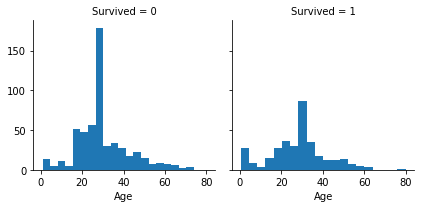

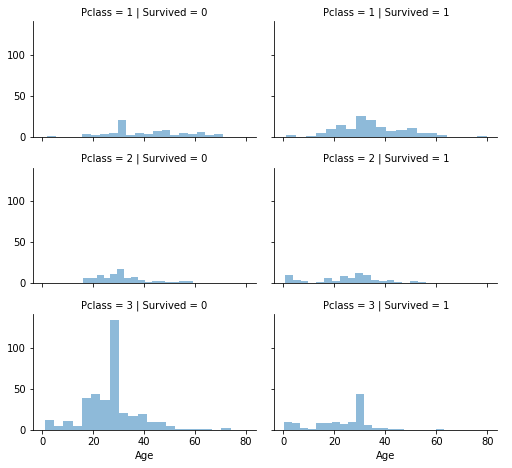

In [0]:
# Pclass, Survived
# groupby
data_temp = \
    train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
data_temp
# Sex, Survived
data_temp2 = \
    train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
data_temp2
# sibsp : 함께 탑승한 형제 또는 배우자 수
data_temp2 = \
    train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
data_temp2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, \
                    aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [0]:
#train.info()
# Name, Sex, Ticket, Cabin, Embarked
# Name, Ticket, Cabin(선실번호), Embarked(탑승한곳)
#train = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
#test = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

###Label Encoder
* 독립 변수가 아닌 종속 변수(라벨)에 대해 사용
* 문자열이나 정수로된 라벨 값을  0  ~  K−1 까지의 정수로 변환
* 변환된 규칙은 classes_ 속성에서 확인
* 예측 결과에 적용할 수 있도록 역변환을 위한 inverse_transform 메서드도 지원

In [0]:
labelSex = LabelEncoder()
labelSex.fit(train['Sex'])
labelSex.fit(test['Sex'])
train['Sex'] = labelSex.transform(train['Sex'])
test['Sex'] = labelSex.transform(test['Sex'])

In [0]:
x = np.array(train.drop(['Survived'], 1).astype(float))

In [0]:
y = np.array(train['Survived'])

In [0]:
x.shape, y.shape

((891, 7), (891,))

In [0]:
#kmeans = KMeans(n_clusters=2)
kmeans = KMeans(n_clusters=2, max_iter=900, algorithm="auto")
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=900,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
correct = 0
for i in range(len(x)):
    predict_m = np.array(x[i].astype(float))
    predict_m = predict_m.reshape(-1, len(predict_m))
    prediction = kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

In [0]:
print(correct/len(x))

0.49158249158249157


In [0]:
x.shape

(891, 7)

In [0]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [0]:
x_scaled.shape
#x_scaled

(891, 7)

In [0]:
correct = 0
for i in range(len(x_scaled)):
    predict_m = np.array(x_scaled[i].astype(float))
    predict_m = predict_m.reshape(-1, len(predict_m))
    prediction = kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

In [0]:
print(correct/len(x))

0.6161616161616161
